In [2]:
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

sentences = list()
sentence = list()
with open('annotations_hsy2.tsv') as file:
  for line in file:
      if line != "\n":
        sentence.append(line.split('\t')[1])
      if line == "\n" and sentence:
        sentences.append(sentence)
        sentence = list()

stop_words = set(stopwords.words('english'))
clear_data = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TheHs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_sentence(sentence):
    cleaned = []
    for lemma in sentence:
        cleaned_tek = re.sub(r"[^\w\s]|[\d]", "", lemma.lower())
        if len(cleaned_tek) != len(lemma) or len(cleaned_tek) <3:
          continue;

        if cleaned_tek and cleaned_tek not in stop_words:
            cleaned.append(cleaned_tek)
    return cleaned

for sentence in sentences:
    clear_data.append(clean_sentence(sentence))
print(clear_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
from gensim.models import Word2Vec
w2v = Word2Vec(sentences=clear_data, epochs=70, window=4, min_count=3)


In [43]:
w2v.wv.most_similar("cpu")

[('cooling', 0.5066497325897217),
 ('dlp', 0.4873884916305542),
 ('favorable', 0.43207690119743347),
 ('speed', 0.42592835426330566),
 ('channels', 0.4201490581035614),
 ('pentium', 0.41067034006118774),
 ('chmos', 0.4082058370113373),
 ('heatsink', 0.4002661406993866),
 ('isa', 0.3999987244606018),
 ('teague', 0.3973487615585327)]

In [6]:
words = list(w2v.wv.key_to_index.keys())
print("All words in model:", words)

word_vector = w2v.wv['astronomers'] 
print("Victor of word 'astronomers':", word_vector)

All words in model: ['would', 'one', 'article', 'like', 'get', 'university', 'know', 'people', 'think', 'also', 'could', 'new', 'use', 'edu', 'even', 'may', 'see', 'good', 'make', 'many', 'much', 'two', 'anyone', 'time', 'first', 'want', 'say', 'need', 'way', 'used', 'since', 'world', 'really', 'believe', 'still', 'might', 'please', 'computer', 'find', 'right', 'going', 'system', 'god', 'take', 'something', 'using', 'back', 'never', 'last', 'said', 'well', 'without', 'someone', 'state', 'read', 'david', 'windows', 'must', 'work', 'made', 'usa', 'government', 'another', 'got', 'better', 'number', 'problem', 'sure', 'seems', 'software', 'come', 'information', 'look', 'things', 'part', 'help', 'version', 'file', 'every', 'give', 'point', 'little', 'put', 'around', 'probably', 'data', 'question', 'different', 'try', 'run', 'tell', 'image', 'long', 'john', 'anything', 'best', 'set', 'years', 'available', 'support', 'least', 'program', 'power', 'enough', 'let', 'lot', 'thing', 'space', 'look

4. С использованием библиотечной реализации метода подсчета косинусного расстояния между векторными представлениями текста

In [45]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def cosine_similarity(a, b):
    return (1 - np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))) / 2
word = "cpu"
similar_words = ["memory", "hardware", "disk"]
related_words = ["software", "coding", "keyboard"] 
unrelated_words = ["philosophy", "hypothesis", "president"]

print("Cosine distance between similar words.")
for similar_word in similar_words:
    print(f"{word} - {similar_word}: {cosine_similarity(w2v.wv[word], w2v.wv[similar_word])}")

print("Cosine distance between related words.")
for related_word in related_words:
    print(f"{word} - {related_word}: {cosine_similarity(w2v.wv[word], w2v.wv[related_word])}")

print("Cosine distance between unrelated words.")
for distant_word in unrelated_words:
    print(f"{word} - {distant_word}: {cosine_similarity(w2v.wv[word], w2v.wv[distant_word])}")

Cosine distance between similar words.
cpu - memory: 0.30905649065971375
cpu - hardware: 0.31348544359207153
cpu - disk: 0.3280070424079895
Cosine distance between related words.
cpu - software: 0.43064916133880615
cpu - coding: 0.43419674038887024
cpu - keyboard: 0.42189498990774155
Cosine distance between unrelated words.
cpu - philosophy: 0.5533529631793499
cpu - hypothesis: 0.50861229095608
cpu - president: 0.5576736517250538


5. Применить какой-либо метод сокращения размерностей полученных одним из базовых способов векторизации

<Axes: xlabel='x_coord', ylabel='y_coord'>

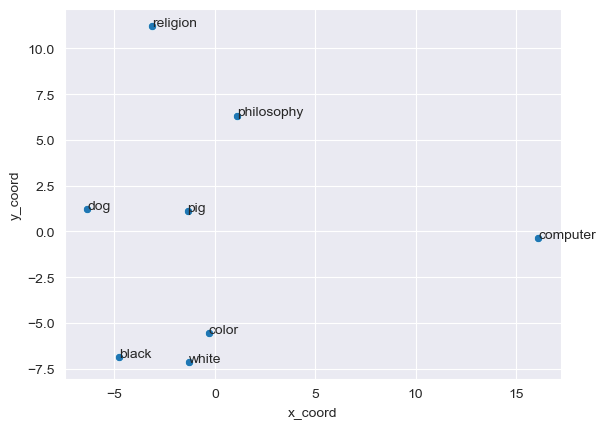

In [37]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

def plot_word_vectors(words, vector_data):
    #получение двумерного представления
    pca_model = PCA(n_components=2)
    reduced_vectors = pd.DataFrame(pca_model.fit_transform([vector_data[word] for word in words]))

    reduced_vectors.index = words
    reduced_vectors.columns = ["x_coord", "y_coord"]

    scatter_plot = sns.scatterplot(data=reduced_vectors, x="x_coord", y="y_coord")

    # Добавление меток для каждой точки
    for word in reduced_vectors.index:
        coordinates = reduced_vectors.loc[word]
        scatter_plot.text(coordinates.x_coord, coordinates.y_coord, word)

    return scatter_plot
    
words_to_plot = ["black", "white", "color", "philosophy", "religion", "computer", "pig", "dog"]
plot_word_vectors(words_to_plot, w2v.wv)


6. Implement a method that vectorizes arbitrary text using the following algorithm

In [38]:
import numpy as np
def calculate_vectors(sentences, w2v):
    final_vector = np.zeros(w2v.vector_size)

    for sentence in sentences:
        current_sentence_vector = np.zeros(w2v.vector_size)

        for word in sentence:
            if word in w2v.wv.key_to_index:
                current_sentence_vector += w2v.wv[word]

        if len(sentence) > 0:
            current_sentence_vector /= len(sentence)

        final_vector += current_sentence_vector

    if len(sentences) > 0:
        final_vector /= len(sentences)

    return final_vector

calculate_vectors(clear_data, w2v)

array([ 0.12823231,  0.07241363,  0.10164374,  0.28844472,  0.26806145,
        0.05608518,  0.12795816,  0.12034794,  0.24320457,  0.08753175,
        0.25704651, -0.0077173 ,  0.1020861 ,  0.05130492, -0.3006353 ,
        0.19116137,  0.24611104, -0.10404616,  0.03913587, -0.01602797,
        0.12169127, -0.02880568,  0.01000797, -0.0013939 , -0.138169  ,
        0.10763461, -0.0272217 ,  0.11629529,  0.2741425 , -0.08844909,
       -0.06761137,  0.08323732, -0.03480698,  0.27977241,  0.04254659,
        0.04149695,  0.12682527, -0.29062108,  0.07914205,  0.34044767,
       -0.07558792,  0.02977625,  0.00206105, -0.25692384, -0.17251998,
       -0.13833389, -0.03395543, -0.14224281,  0.15906788,  0.01416354,
       -0.33428504,  0.09954582,  0.01534253, -0.09058224,  0.44927591,
        0.04750395, -0.24774774,  0.07663909,  0.01038702,  0.1322697 ,
       -0.2524515 , -0.12433866, -0.04614699, -0.03112801, -0.13552765,
       -0.06816046, -0.09350951, -0.00507341, -0.05384051, -0.04

In [39]:
import os
import chardet
from scipy.sparse import csr_matrix, save_npz
def detect_encoding(file_path):

    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(10000000))
    return result['encoding']
def process_file(file_path):

    sentences = []
    sentence = []

    with open(file_path, 'r', encoding=detect_encoding(file_path)) as file:
        for line in file:
            if line != "\n":
                sentence.append(line.split('\t')[1])
            if line == "\n" and sentence:
                sentences.append(sentence)
                sentence = []

    clear_data = []
    for sent in sentences:
        clear_data.append(clean_sentence(sent))

    return clear_data

def save_vectors_to_tsv(file_vectors, output_tsv_path):

    with open(output_tsv_path, 'w', encoding='utf-8') as f:
        for doc_id, vector in file_vectors.items():
            vector_str = '\t'.join(map(str, vector))
            f.write(f"{doc_id}\t{vector_str}\n")


def process_directory(directory_path, output_tsv_path):

    file_vectors = {}

    for filename in os.listdir(directory_path):
        if filename.endswith(".tsv"):
            file_path = os.path.join(directory_path, filename)
            doc_id = os.path.splitext(os.path.basename(file_path))[0]
            clear_data = process_file(file_path)
            document_vector = calculate_vectors(clear_data, w2v)
            file_vectors[doc_id] = document_vector

    save_vectors_to_tsv(file_vectors, output_tsv_path)
    return file_vectors


directory = 'corpus'

doc_vec = process_directory(directory, 'space_vec.tsv')

In [11]:
flat_list = [item for sublist in clear_data for item in sublist]
unique_words = list(set(flat_list))

1 задание - сохранение матрицы термин документ

In [12]:
import os
import numpy as np
from collections import defaultdict, Counter
from scipy.sparse import csr_matrix

def process_directory(directory_path):
    doc_texts = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".tsv"):
            file_path = os.path.join(directory_path, filename)
            doc_id = os.path.splitext(filename)[0]  # Удаляем расширение
            doc_texts[doc_id] = [item for sublist in process_file(file_path) for item in sublist]
    return doc_texts

def create_term_doc_matrix(doc_texts):
    # Собираем все уникальные токены
    token_freq = defaultdict(int)
    for doc_id, tokens in doc_texts.items():
        for token in tokens:
            token_freq[token] += 1
    unique_tokens = list(token_freq.keys())

    token_index = {token: i for i, token in enumerate(unique_tokens)}

    # Create a matrix to store data
    rows = []
    cols = []
    data = []

    doc_index = {doc_id: idx for idx, doc_id in enumerate(doc_texts.keys())}  # Mapping

    for doc_id, tokens in doc_texts.items():
        doc_idx = doc_index[doc_id]
        token_counts = Counter(tokens)
        for token, count in token_counts.items():
            if token in token_index:
                token_idx = token_index[token]
                rows.append(doc_idx)
                cols.append(token_idx)
                data.append(count)

    term_doc_matrix = csr_matrix((data, (rows, cols)), shape=(len(doc_texts), len(unique_tokens)))

    return term_doc_matrix, doc_index, token_index, token_freq

def save_term_doc_matrix_to_tsv(term_doc_matrix, doc_index, token_index, output_tsv_path, unique_tokens):
    dense_matrix = term_doc_matrix.toarray()
    with open(output_tsv_path, 'w', encoding='utf-8') as tsv_file:
        # take title
        header = ['doc_id'] + unique_tokens
        tsv_file.write('\t'.join(header) + '\n')

        # record lines
        for doc_id, doc_idx in doc_index.items():
            row = [doc_id] + list(map(str, dense_matrix[doc_idx]))
            tsv_file.write('\t'.join(row) + '\n')

        # Calculate the sum for each token and write it to the end
        token_sums = dense_matrix.sum(axis=0)  # A1 transforms the sparse array into a regular one-dimensional one
        sum_row = ['Total'] + list(map(str, token_sums))
        tsv_file.write('\t'.join(sum_row) + '\n')

directory_path = 'corpus'
output_tsv_path = 'term_doc_matrix.tsv'

doc_texts = process_directory(directory_path)

term_doc_matrix, doc_index, token_index, token_freq = create_term_doc_matrix(doc_texts)
unique_tokens = list(token_freq.keys())
save_term_doc_matrix_to_tsv(term_doc_matrix, doc_index, token_index, output_tsv_path, unique_tokens)